# Since Curve Demo

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn.apionly as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
def make_simple_plot():
    fig, axes=plt.subplots(figsize=(12,5), nrows=1, ncols=2);
    axes[0].set_ylabel("$y$")
    axes[0].set_xlabel("$x$")
    axes[1].set_xlabel("$x$")
    axes[1].set_yticklabels([])
    axes[0].set_ylim([-2,2])
    axes[1].set_ylim([-2,2])
    plt.tight_layout();
    return axes

## Model fit and amount of data

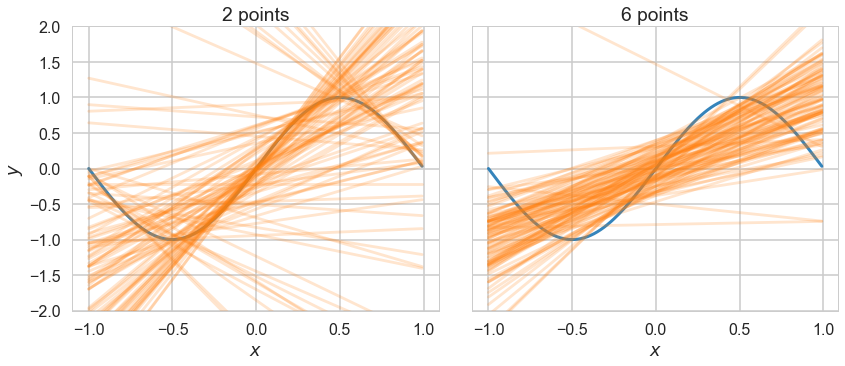

In [6]:
xs=np.arange(-1.,1.,0.01)
ff = lambda x: np.sin(np.pi*x)
ffxs=ff(xs)
from sklearn.linear_model import Ridge
axes=make_simple_plot()
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
axes[0].plot(xs, ff(xs), alpha=0.9, lw=3, color=c0)
axes[1].plot(xs, ff(xs), alpha=0.9, lw=3, color=c0)
D2=np.empty((100,2), dtype="int")
for i in range(100):
    D2[i,:] = np.random.choice(200, replace=False, size=2)
D6=np.empty((100,6), dtype="int")
for i in range(100):
    D6[i,:] = np.random.choice(200, replace=False, size=6)
for i in range(100):
    choices2 = D2[i,:]
    choices6 = D6[i,:]
    p2=np.polyfit(xs[choices2], ffxs[choices2],1)
    p6=np.polyfit(xs[choices6], ffxs[choices6],1)
    axes[0].plot(xs, np.polyval(p2, xs), color=c1, alpha=0.2)
    axes[1].plot(xs, np.polyval(p6, xs), color=c1, alpha=0.2)
axes[0].set_title("2 points");
axes[1].set_title("6 points");

Fitting a straight line to only 2 points leads to a lot of variance. With 6 points, the lines look better.

## Regularization of the straight lines fit to 3 points

(100, 3)


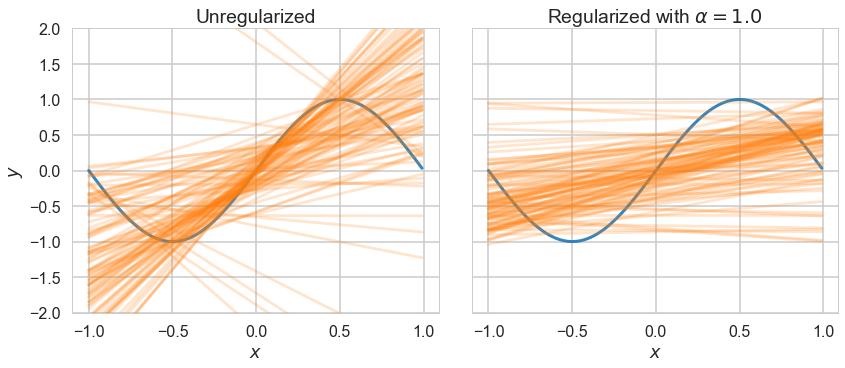

In [15]:
xs=np.arange(-1.,1.,0.01)
ff = lambda x: np.sin(np.pi*x)
ffxs=ff(xs)
from sklearn.linear_model import Ridge
axes=make_simple_plot()
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
axes[0].plot(xs, ff(xs), alpha=0.9, lw=3, color=c0)
axes[1].plot(xs, ff(xs), alpha=0.9, lw=3, color=c0)
from sklearn.linear_model import Ridge
D=np.empty((100,3), dtype="int")
print(D.shape)
for i in range(100):
    D[i,:] = np.random.choice(200, replace=False, size=3)
for i in range(100):
    choices = D[i,:]
    p1=np.polyfit(xs[choices], ffxs[choices],1)
    alpha=1.0
    est = Ridge(alpha=alpha)
    est.fit(xs[choices].reshape(-1,1), ffxs[choices])
    axes[0].plot(xs, np.polyval(p1, xs), color=c1, alpha=0.2)
    axes[1].plot(xs, est.predict(xs.reshape(-1,1)), color=c1, alpha=0.2)
axes[0].set_title("Unregularized");
axes[1].set_title("Regularized with $\\alpha={}$".format(alpha));

Normally fitting a straight line to 3 points results in a lot of variance. But things look much better once you choose some regularization. Play with the regularization parameter to see what happens.